<a href="https://colab.research.google.com/github/RainDeath29/PracticeWork/blob/main/PracticeWork3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

X_data_2d = np.array([[0, 0],
       [1, 0], [2, 0], [3, 0], [4, 0], [0, 1], [1, 1], [2, 1], [3, 1], [4, 1],
       [0, 2], [1, 2], [2, 2], [3, 2], [4, 2], [0, 3], [1, 3], [2, 3], [3, 3],
       [4, 3], [0, 4], [1, 4],[2, 4], [3, 4], [4, 4]])

y_data_2d = np.array([ 2.49014246,  2.5852071 ,  6.94306561, 11.56908957,  8.29753988,
        1.29758913, 11.73763845, 14.30230419, 15.59157684, 23.62768013,
        3.60974692, 11.60281074, 21.72588681, 23.26015927, 31.8252465 ,
        8.31313741, 17.96150664, 32.942742  , 40.27592777, 49.7630889 ,
       21.39694631, 30.3226711 , 45.20258461, 54.72575544, 71.36685183])

print("Клітинка 1: Бібліотеки імпортовано та дані завантажено успішно.")

Клітинка 1: Бібліотеки імпортовано та дані завантажено успішно.


# Завдання 4: Пошук найкращої двовимірної регресійної моделі
---
### Частина 1: Аналіз поліноміальних моделей

In [16]:
pipe_poly_2d = make_pipeline(PolynomialFeatures(), LinearRegression())

param_grid_2d = {'polynomialfeatures__degree': [1, 2, 3, 4]}

grid_poly_2d = GridSearchCV(pipe_poly_2d, param_grid=param_grid_2d, cv=5, scoring='r2')

grid_poly_2d.fit(X_data_2d, y_data_2d)

print("--- Результати пошуку для 2D поліноміальної моделі ---")
print(f"Найкращий степінь полінома: {grid_poly_2d.best_params_['polynomialfeatures__degree']}")
print(f"Найкраща середня оцінка (R^2): {grid_poly_2d.best_score_:.4f}")

results_df_2d = pd.DataFrame(grid_poly_2d.cv_results_)
print("\nДетальні результати для кожного степеня:")
print(results_df_2d[['param_polynomialfeatures__degree', 'mean_test_score', 'std_test_score']])

--- Результати пошуку для 2D поліноміальної моделі ---
Найкращий степінь полінома: 2
Найкраща середня оцінка (R^2): 0.2967

Детальні результати для кожного степеня:
   param_polynomialfeatures__degree  mean_test_score  std_test_score
0                                 1        -1.423779        4.106874
1                                 2         0.296663        1.225988
2                                 3        -1.369418        4.314227
3                                 4        -3.468732        8.102186


--- Деталі для найкращої 2D поліноміальної моделі (Степінь 2) ---
Вільний член (intercept): 2.4383
Коефіцієнти для ознак:
  x0: 3.0737
  x1: -2.2668
  x0^2: -0.2556
  x0 x1: 2.6419
  x1^2: 1.5706

Коефіцієнт детермінації (R^2) на всіх даних: 0.9862

Прогноз моделі для точки [2.5 2.5]: y = 29.1859


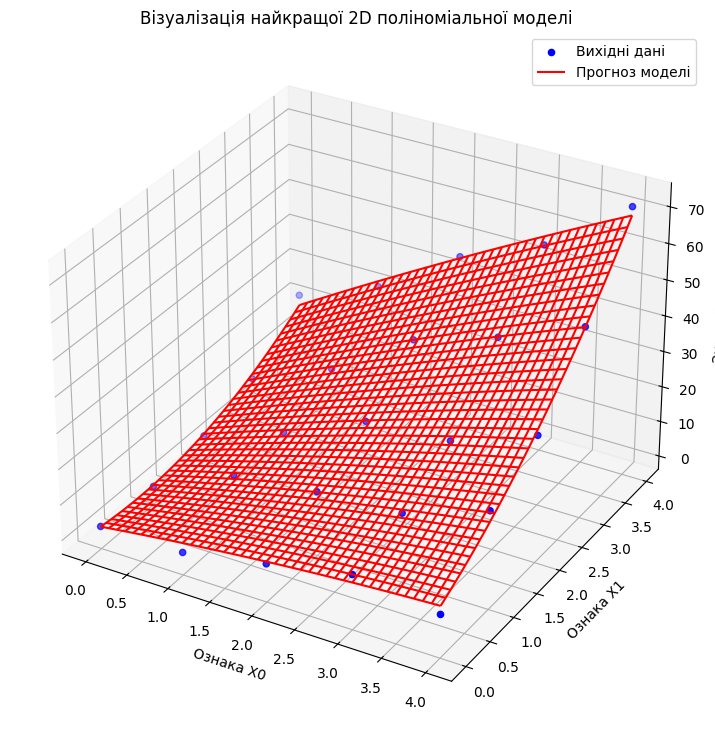

In [17]:
best_poly_model_2d = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
best_poly_model_2d.fit(X_data_2d, y_data_2d)

poly_features_step = best_poly_model_2d.named_steps['polynomialfeatures']
linear_reg_step = best_poly_model_2d.named_steps['linearregression']

feature_names = poly_features_step.get_feature_names_out(['x0', 'x1'])
coefficients = linear_reg_step.coef_
intercept = linear_reg_step.intercept_

print("--- Деталі для найкращої 2D поліноміальної моделі (Степінь 2) ---")
print(f"Вільний член (intercept): {intercept:.4f}")
print("Коефіцієнти для ознак:")
for name, coef in zip(feature_names[1:], coefficients[1:]):
    print(f"  {name}: {coef:.4f}")

r2_score_2d = best_poly_model_2d.score(X_data_2d, y_data_2d)
print(f"\nКоефіцієнт детермінації (R^2) на всіх даних: {r2_score_2d:.4f}")

x_new_2d = np.array([[2.5, 2.5]])
y_new_2d = best_poly_model_2d.predict(x_new_2d)
print(f"\nПрогноз моделі для точки {x_new_2d[0]}: y = {y_new_2d[0]:.4f}")

x0_grid, x1_grid = np.meshgrid(np.arange(0, 4.1, 0.1), np.arange(0, 4.1, 0.1))
X_plot = np.vstack([x0_grid.ravel(), x1_grid.ravel()]).T
y_plot = best_poly_model_2d.predict(X_plot)
Y_plot_grid = y_plot.reshape(x0_grid.shape)

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_data_2d[:, 0], X_data_2d[:, 1], y_data_2d, c='blue', marker='o', label='Вихідні дані')
ax.plot_wireframe(x0_grid, x1_grid, Y_plot_grid, color='red', label='Прогноз моделі')

ax.set_xlabel('Ознака X0')
ax.set_ylabel('Ознака X1')
ax.set_zlabel('Значення Y')
ax.set_title('Візуалізація найкращої 2D поліноміальної моделі')
ax.legend()
plt.show()

### Частина 2: Аналіз моделей на основі Багатошарового Перцептрона (MLP)

In [18]:
pipe_mlp_2d = make_pipeline(StandardScaler(), MLPRegressor(random_state=42, max_iter=5000))

param_grid_mlp_2d = {
    'mlpregressor__hidden_layer_sizes': [
        (10,), (20,),
        (10, 5), (20, 10),
        (10, 10, 10)
    ]
}

grid_mlp_2d = GridSearchCV(pipe_mlp_2d, param_grid=param_grid_mlp_2d, cv=5, scoring='r2')

grid_mlp_2d.fit(X_data_2d, y_data_2d)

print("--- Результати пошуку для 2D MLP моделі ---")
print(f"Найкраща архітектура: {grid_mlp_2d.best_params_['mlpregressor__hidden_layer_sizes']}")
print(f"Найкраща середня оцінка (R^2): {grid_mlp_2d.best_score_:.4f}")

results_mlp_df_2d = pd.DataFrame(grid_mlp_2d.cv_results_)
print("\nДетальні результати для кожної архітектури:")
print(results_mlp_df_2d[['param_mlpregressor__hidden_layer_sizes', 'mean_test_score', 'std_test_score']])

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perce

--- Результати пошуку для 2D MLP моделі ---
Найкраща архітектура: (10,)
Найкраща середня оцінка (R^2): 0.4089

Детальні результати для кожної архітектури:
  param_mlpregressor__hidden_layer_sizes  mean_test_score  std_test_score
0                                  (10,)         0.408866        0.613091
1                                  (20,)        -0.617076        2.867390
2                                (10, 5)         0.170876        1.335679
3                               (20, 10)        -0.481467        2.561677
4                           (10, 10, 10)        -1.223923        3.984503


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(


--- Деталі для найкращої 2D MLP моделі (Архітектура (10,)) ---

Коефіцієнт детермінації (R^2) на всіх даних: 0.9750

Прогноз моделі для точки [2.5 2.5]: y = 33.4278


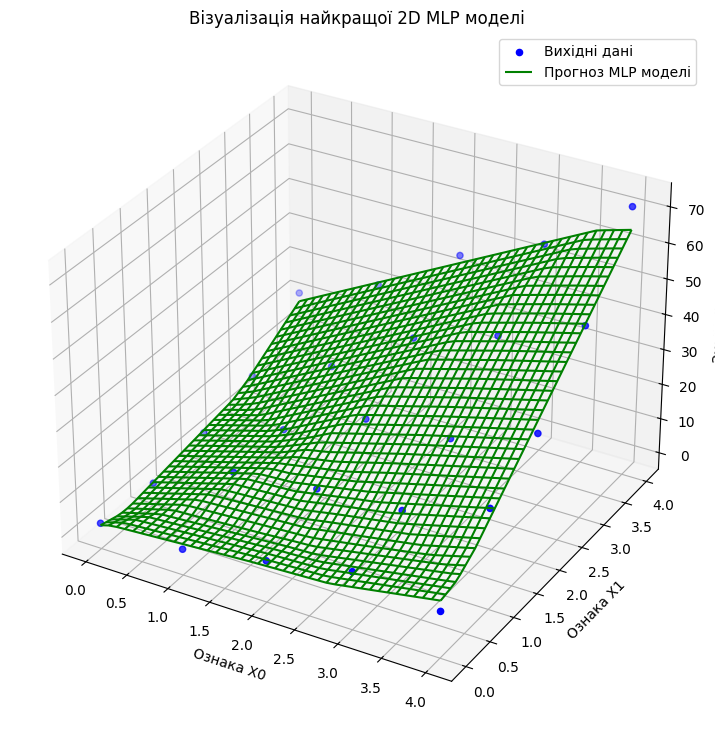

In [19]:
best_mlp_model_2d = make_pipeline(
    StandardScaler(),
    MLPRegressor(hidden_layer_sizes=(10,), random_state=42, max_iter=5000)
)
best_mlp_model_2d.fit(X_data_2d, y_data_2d)

mlp_step = best_mlp_model_2d.named_steps['mlpregressor']
print("--- Деталі для найкращої 2D MLP моделі (Архітектура (10,)) ---")

r2_score_mlp_2d = best_mlp_model_2d.score(X_data_2d, y_data_2d)
print(f"\nКоефіцієнт детермінації (R^2) на всіх даних: {r2_score_mlp_2d:.4f}")

x_new_2d_mlp = np.array([[2.5, 2.5]])
y_new_2d_mlp = best_mlp_model_2d.predict(x_new_2d_mlp)
print(f"\nПрогноз моделі для точки {x_new_2d_mlp[0]}: y = {y_new_2d_mlp[0]:.4f}")

x0_grid_mlp, x1_grid_mlp = np.meshgrid(np.arange(0, 4.1, 0.1), np.arange(0, 4.1, 0.1))
X_plot_mlp = np.vstack([x0_grid_mlp.ravel(), x1_grid_mlp.ravel()]).T
y_plot_mlp = best_mlp_model_2d.predict(X_plot_mlp)
Y_plot_grid_mlp = y_plot_mlp.reshape(x0_grid_mlp.shape)

fig_mlp = plt.figure(figsize=(12, 9))
ax_mlp = fig_mlp.add_subplot(111, projection='3d')

ax_mlp.scatter(X_data_2d[:, 0], X_data_2d[:, 1], y_data_2d, c='blue', marker='o', label='Вихідні дані')
ax_mlp.plot_wireframe(x0_grid_mlp, x1_grid_mlp, Y_plot_grid_mlp, color='green', label='Прогноз MLP моделі')

ax_mlp.set_xlabel('Ознака X0')
ax_mlp.set_ylabel('Ознака X1')
ax_mlp.set_zlabel('Значення Y')
ax_mlp.set_title('Візуалізація найкращої 2D MLP моделі')
ax_mlp.legend()
plt.show()

### Загальний висновок по Задачі 4

В результаті аналізу було проведено пошук найкращої двовимірної регресійної моделі серед поліноміальних моделей та моделей на основі багатошарового перцептрона (MLP). Порівняння проводилося на основі середньої оцінки коефіцієнта детермінації (R²) на 5-блоковій перехресній перевірці.

Результати порівняння найкращих моделей кожного типу представлені в таблиці:

| Тип моделі | Найкраща конфігурація | Найкраща середня оцінка (R²) |
| :--- | :--- | :--- |
| **Поліноміальна регресія** | Степінь 2 | **0.2967** |
| **Багатошаровий перцептрон (MLP)** | Архітектура (10,) | **0.4089** |

**Загальний висновок:**

Обидва типи моделей змогли знайти певну залежність у даних, про що свідчать позитивні оцінки R². Проте, **найкращою моделлю для даного набору даних є багатошаровий перцептрон (MLP) з архітектурою `(10,)`**, оскільки вона показала значно вищу середню оцінку на перехресній перевірці (R² ≈ 0.41) порівняно з найкращою поліноміальною моделлю 2-го степеня (R² ≈ 0.30). Це свідчить про те, що нейронна мережа змогла краще узагальнити закономірності в даних.